# In this file I am going to create plots showing the EDV, ESV, EF< SV for the four different pathologies calculated using Simpsonsmethod

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
def box_plots(df, ylabel, save_path = None):
    # Create figure with appropriate size and spacing (matching your reference style)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Define the exact same modern color palette
    colors = {
        'no_top': '#118ab2ff',      # Modern blue
        'all_slices': '#ef476fff',  # JAHA red
        'offset': "#06d6a0ff",      # matching green that also colorblind people can differentiate
        'ground_truth': "#000000", # black
        'volume_mesh': "#073b4cff"   # grey
    }
    
    # Create a custom palette using your defined colors
    # Assuming you have groups, we'll use the main colors from your palette
    custom_palette = [colors['volume_mesh'] ,colors['all_slices'], colors['no_top'], colors['offset']]

    # Create boxplot with custom styling to match your reference plots
    box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df, 
                        palette=custom_palette, width=0.6, ax=ax,
                        linewidth=1, fliersize=0)  # Remove outlier markers

    # Customize box plot elements to match your style
    for patch in box_plot.artists:
        patch.set_alpha(0.6)  # Match the alpha from your reference plots

    # Add individual points with swarmplot using black color (matching your reference)
    sns.swarmplot(x='Group', y=f'{ylabel}', data=df,
                color=colors['ground_truth'], size=4, alpha=0.8, ax=ax)

    # Beautiful labels and title with better sizing (matching your reference style exactly)
    ax.set_xlabel('', fontsize=16, fontweight='bold', color='#000000')  # Empty as in original

    if ylabel=="EF":
        ax.set_ylabel(f'{ylabel} [%]', fontsize=14, fontweight='bold', color='#000000')
    else:
        ax.set_ylabel(f'{ylabel} [ml]', fontsize=14, fontweight='bold', color='#000000')
    #ax.set_title('Ejection Fraction (EF) across Pathologies', fontsize=18, fontweight='bold', color='#000000', pad=15)

    # Improve tick styling (matching your reference)
    ax.tick_params(axis='both', which='major', labelsize=11, colors='#000000')

    # Tilt x-axis labels and handle long labels with line breaks
    x_labels = ax.get_xticklabels()
    new_labels = []
    for label in x_labels:
        text = label.get_text()
        # Split long labels into two lines (adjust threshold as needed)
        if len(text) > 12:  # You can adjust this threshold
            words = text.split()
            if len(words) > 1:
                mid = len(words) // 2
                line1 = ' '.join(words[:mid])
                line2 = ' '.join(words[mid:])
                new_labels.append(f"{line1}\n{line2}")
            else:
                new_labels.append(text)
        else:
            new_labels.append(text)

    # Set the modified labels with rotation and bold font
    ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')

    # Ensure bold formatting is applied to all x-tick labels
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')

    # Remove grid and clean up spines (exactly like your reference)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#000000')
    ax.spines['bottom'].set_color('#000000')


    # Use subplots_adjust for better control over spacing (exactly like your reference)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9)

    if save_path:
        plt.savefig(save_path,dpi = 300)

    plt.show()

In [70]:
#first I need to import the data for the 4 different pathologies in 4 dataframes
#datasets_healthy = ['SCD0003701','SCD0003801','SCD0003901','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
#Leave out 'SCD0003901', because about 50% of the time frames are corrupted and thus I had to cut them out
datasets_healthy = ['SCD0003701','SCD0003801','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
datasets_failure_infarct = ['SCD0000101','SCD0000201','SCD0000301','SCD0000401','SCD0000501','SCD0000601', 'SCD0000701','SCD0000801','SCD0000901','SCD0001001','SCD0001101','SCD0001201']
datasets_failure = ['SCD0001301','SCD0001401','SCD0001501','SCD0001601','SCD0001701','SCD0001801','SCD0001901','SCD0002001','SCD0002101','SCD0002201','SCD0002301','SCD0002401']
datasets_Lv = ['SCD0002501','SCD0002601','SCD0002701','SCD0002801','SCD0002901','SCD0003001','SCD0003101','SCD0003201','SCD0003301','SCD0003401','SCD0003501','SCD0003601']

In [71]:
list_of_dfs_healthy = []

for dataset in datasets_healthy:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/seg_analysis_data/segmentation/ED_ES_state.csv")
        list_of_dfs_healthy.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

healthy_rows = []

for i, df in enumerate(list_of_dfs_healthy):
    name = f"{datasets_healthy[i]}"
    wide = df.pivot_table(index=None, columns='Parameter', values='Value')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    healthy_rows.append(wide)

df_healthy = pd.concat(healthy_rows, ignore_index=True)
print(df_healthy)

Parameter        Name         EDV         EF        ESV          SV
0          SCD0003701  212.733992  61.486012  81.932345  130.801647
1          SCD0003801  209.963838  53.927783  96.734995  113.228843
2          SCD0004001  152.649292  54.113705  70.045105   82.604187
3          SCD0004101  247.949782  62.894836  92.002173  155.947609
4          SCD0004201  231.687715  66.486486  77.646694  154.041021
5          SCD0004301  200.528101  68.475019  63.216446  137.311654
6          SCD0004401  208.502043  59.434842  84.579183  123.922859
7          SCD0004501   83.218750  63.349606  30.500000   52.718750


In [72]:
list_of_dfs_failure_infarct = []

for dataset in datasets_failure_infarct:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/seg_analysis_data/segmentation/ED_ES_state.csv")
        list_of_dfs_failure_infarct.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

failure_infarct_rows = []

for i, df in enumerate(list_of_dfs_failure_infarct):
    name = f"{datasets_failure_infarct[i]}"
    wide = df.pivot_table(index=None, columns='Parameter', values='Value')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    failure_infarct_rows.append(wide)

df_failure_infarct = pd.concat(failure_infarct_rows, ignore_index=True)
print(df_failure_infarct)


Parameter        Name         EDV         EF         ESV          SV
0          SCD0000101  317.446750  21.050462  250.622742   66.824008
1          SCD0000201  265.295986  26.069189  196.135474   69.160512
2          SCD0000301  375.708248  19.854216  301.114320   74.593927
3          SCD0000401  322.988999  28.570767  230.708564   92.280435
4          SCD0000501  403.904480  23.624583  308.483729   95.420751
5          SCD0000601  274.672991  35.904834  176.052108   98.620883
6          SCD0000701  387.186035  20.087286  309.410870   77.775165
7          SCD0000801  730.796444  11.540823  646.456523   84.339921
8          SCD0000901  572.100000  16.172872  479.575000   92.525000
9          SCD0001001  438.083800  17.767184  360.248644   77.835156
10         SCD0001101  304.296641  45.756548  165.061002  139.235639
11         SCD0001201  245.318512  39.890277  147.460277   97.858235


In [73]:
list_of_dfs_failure= []

for dataset in datasets_failure:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/seg_analysis_data/segmentation/ED_ES_state.csv")
        list_of_dfs_failure.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

failure_rows = []

for i, df in enumerate(list_of_dfs_failure):
    name = f"{datasets_failure[i]}"
    wide = df.pivot_table(index=None, columns='Parameter', values='Value')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    failure_rows.append(wide)

df_failure = pd.concat(failure_rows, ignore_index=True)
print(df_failure)

Parameter        Name         EDV         EF         ESV          SV
0          SCD0001301  446.358565  20.861670  353.240712   93.117853
1          SCD0001401  439.644270  26.710884  322.211397  117.432872
2          SCD0001501  345.748815  20.630596  274.418775   71.330040
3          SCD0001601  377.484375  26.416656  277.765625   99.718750
4          SCD0001701  499.968249  23.784172  381.054941  118.913307
5          SCD0001801  328.063823  38.083300  203.126293  124.937530
6          SCD0001901  258.230398  42.555194  148.339952  109.890446
7          SCD0002001  284.474009  51.199159  138.825709  145.648300
8          SCD0002101  334.057617  49.302054  169.360352  164.697266
9          SCD0002201  267.296033  58.867133  109.946522  157.349511
10         SCD0002301  366.999322  32.886829  246.304883  120.694439
11         SCD0002401  377.546188  24.756282  284.079788   93.466400


In [74]:
list_of_dfs_Lv= []

for dataset in datasets_Lv:
    try:
        df = pd.read_csv(f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/seg_analysis_data/segmentation/ED_ES_state.csv")
        list_of_dfs_Lv.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

Lv_rows = []

for i, df in enumerate(list_of_dfs_Lv):
    name = f"{datasets_Lv[i]}"
    wide = df.pivot_table(index=None, columns='Parameter', values='Value')
    wide['Name'] = name
    wide = wide[['Name'] + sorted([col for col in wide.columns if col != 'Name'])]
    Lv_rows.append(wide)

df_Lv = pd.concat(Lv_rows, ignore_index=True)
print(df_Lv)

Parameter        Name         EDV         EF         ESV          SV
0          SCD0002501  160.396312  76.890805   37.066296  123.330016
1          SCD0002601  207.687148  70.704707   60.842559  146.844590
2          SCD0002701  152.396011  57.353122   64.992142   87.403870
3          SCD0002801  212.976837  74.460242   54.393768  158.583069
4          SCD0002901  428.955078  68.417758  135.473633  293.481445
5          SCD0003001  254.959293  64.178886   91.329260  163.630033
6          SCD0003101  300.124506  64.474340  106.621212  193.503294
7          SCD0003201  131.834890  66.085354   44.711336   87.123553
8          SCD0003301  153.247431  63.261124   56.301384   96.946048
9          SCD0003401  181.144465  65.978743   61.627624  119.516842
10         SCD0003501  163.966490  77.040584   37.645749  126.320741
11         SCD0003601   95.314401  57.326639   40.673858   54.640543


# Plot Ejection fraction EF

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


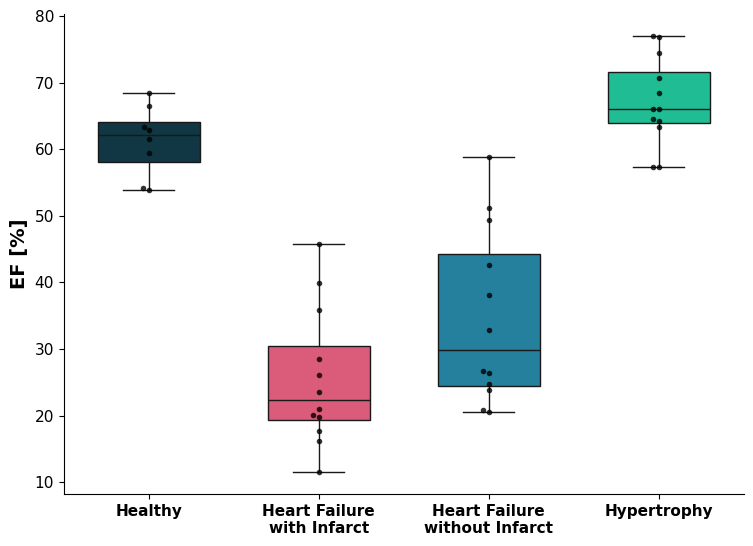

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


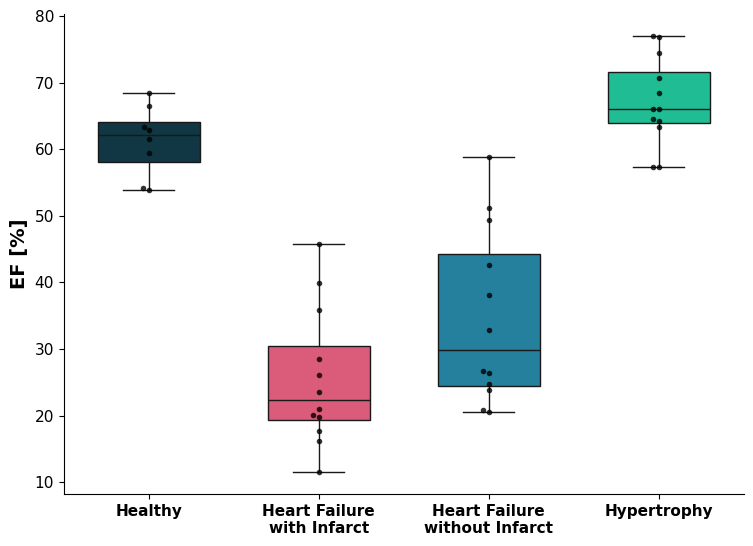

In [75]:
# Combine EF values from different dataframes
df_EF = pd.concat([
    pd.DataFrame({'EF': df_healthy['EF'], 'Group': 'Healthy'}),
    pd.DataFrame({'EF': df_failure_infarct['EF'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'EF': df_failure['EF'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'EF': df_Lv['EF'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "EF"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/EF_Simpsons_Box_Plot.svg"
box_plots(df_EF, ylabel,save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/EF_Simpsons_Box_Plot.pdf"
box_plots(df_EF, ylabel,save_path=save_path)

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


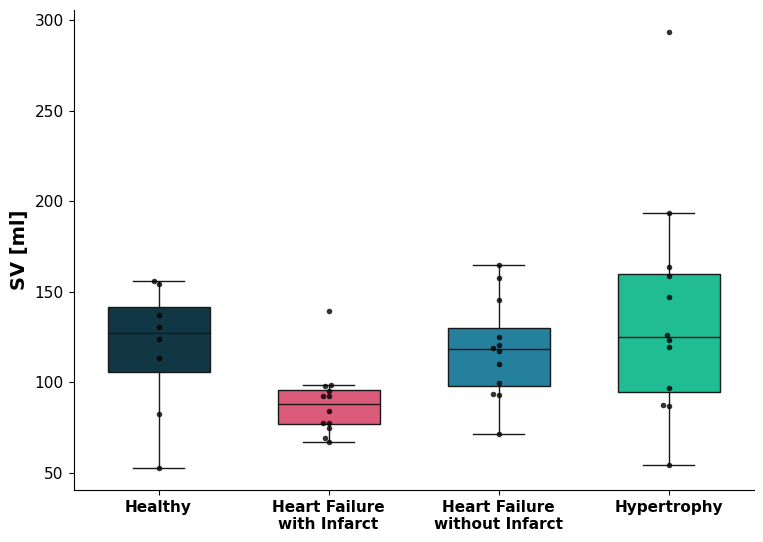

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


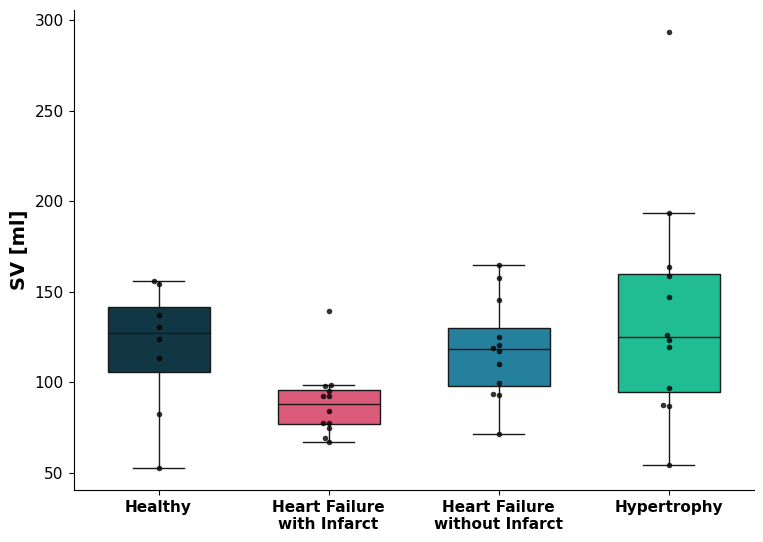

In [76]:
# Combine SV values from different dataframes
df_SV = pd.concat([
    pd.DataFrame({'SV': df_healthy['SV'], 'Group': 'Healthy'}),
    pd.DataFrame({'SV': df_failure_infarct['SV'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'SV': df_failure['SV'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'SV': df_Lv['SV'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "SV"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/SV_Simpsons_Box_Plot.svg"
box_plots(df_SV, ylabel, save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/SV_Simpsons_Box_Plot.pdf"
box_plots(df_SV, ylabel, save_path=save_path)

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


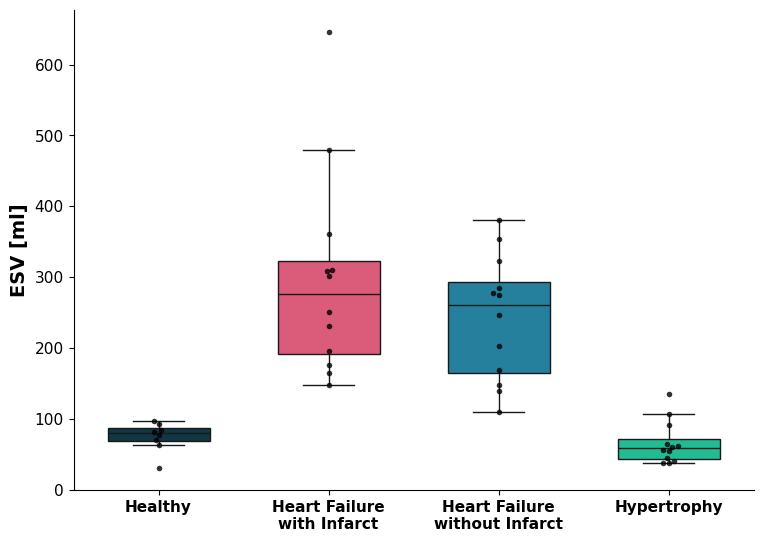

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


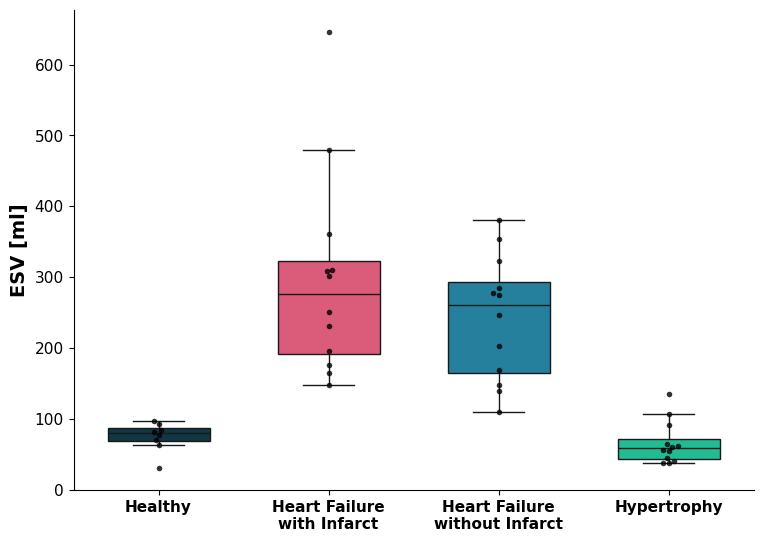

In [77]:
# Combine ESV values from different dataframes
df_ESV = pd.concat([
    pd.DataFrame({'ESV': df_healthy['ESV'], 'Group': 'Healthy'}),
    pd.DataFrame({'ESV': df_failure_infarct['ESV'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'ESV': df_failure['ESV'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'ESV': df_Lv['ESV'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "ESV"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/ESV_Simpsons_Box_Plot.svg"
box_plots(df_ESV, ylabel,save_path = save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/ESV_Simpsons_Box_Plot.pdf"
box_plots(df_ESV, ylabel,save_path = save_path)

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


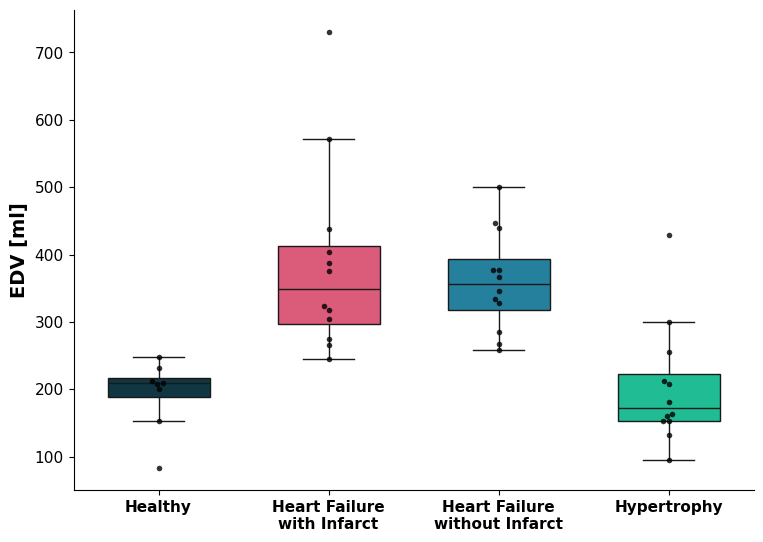

/tmp/ipykernel_3876894/1935889395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='Group', y=f'{ylabel}', data=df,
/tmp/ipykernel_3876894/1935889395.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=0, fontweight='bold')


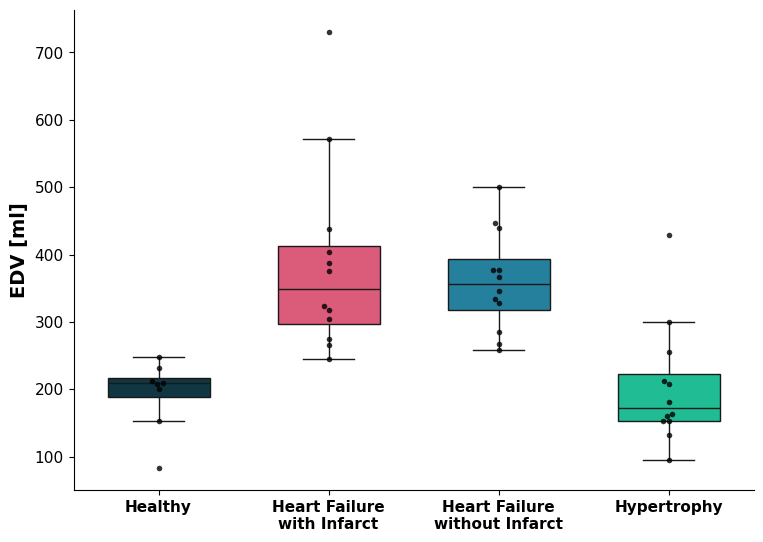

In [78]:
# Combine EDV values from different dataframes
df_EDV = pd.concat([
    pd.DataFrame({'EDV': df_healthy['EDV'], 'Group': 'Healthy'}),
    pd.DataFrame({'EDV': df_failure_infarct['EDV'], 'Group': 'Heart Failure with Infarct'}),
    pd.DataFrame({'EDV': df_failure['EDV'], 'Group': 'Heart Failure without Infarct'}),
    pd.DataFrame({'EDV': df_Lv['EDV'], 'Group': 'Hypertrophy'}),
], ignore_index=True)

ylabel = "EDV"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/EDV_Simpsons_Box_Plot.svg"
box_plots(df_EDV, ylabel,save_path=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Simpsons_method/EDV_Simpsons_Box_Plot.pdf"
box_plots(df_EDV, ylabel,save_path=save_path)